In [5]:
import librosa
import librosa.display
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

base_dir = 'C:\\Users\\medep\\Downloads\\project dataset\\data'

audio_data = []
labels = []
dataset = []


max_length = 44100  


for label_dir in glob.iglob(os.path.join(base_dir, '*')):
    label = os.path.basename(label_dir)
    print(f'Processing label: {label}')
    
    for audio_file in glob.iglob(os.path.join(label_dir, '*.wav')):

        y, sr = librosa.load(audio_file, sr=None)
        y = pad_sequences([y], maxlen=max_length, padding='post', truncating='post')[0]

        audio_data.append(y)
        labels.append(label)
        duration = librosa.get_duration(path=audio_file)
        filename = os.path.basename(audio_file)
        if duration>= 3:
            slice_size = 3
            iterations = int((duration-slice_size)/(slice_size-1))
            iterations += 1
            initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
            for i in range(iterations):
                offset = initial_offset + i*(slice_size-1)
                dataset.append({"filename": audio_file, "label": label, "offset":offset})
            
audio_data = np.array(audio_data)
labels = np.array(labels)

print("Data loading and preprocessing complete.")
print("Shape of audio data array:", audio_data.shape)
print("Shape of labels array:", labels.shape)



Processing label: AtlanticSpottedDolphin
Processing label: BAIJI_DOLPHIN
Processing label: BeakedWhales
Processing label: BeardedSeal
Processing label: Beluga_WhiteWhale
Processing label: BlueWhale
Processing label: BottlenoseDolphin
Processing label: Boutu_AmazonRiverDolphin
Processing label: BowheadWhale
Processing label: BrydesWhale
Processing label: ClymeneDolphin
Processing label: CommersonDolphin
Processing label: CommonDolphin
Processing label: Common_Shrimp
Processing label: Dall'sPorpoise
Processing label: DuskyDolphin
Processing label: FalseKillerWhale
Processing label: FinlessPorpoise
Processing label: Fin_FinbackWhale
Processing label: FraserDolphin
Processing label: Grampus_RissoDolphin
Processing label: GraySeal
Processing label: GrayWhale
Processing label: HarborPorpoise
Processing label: HarbourSeal
Processing label: HarpSeal
Processing label: HeavisideDolphin
Processing label: HoodedSeal
Processing label: HumpbackWhale
Processing label: Indian_ocean_humpback_dolphin
Pr

In [7]:
dataset = pd.DataFrame(dataset)

In [8]:
dataset.head()

,filename,label,offset
0,C:\Users\medep\Downloads\project dataset\data\...,AtlanticSpottedDolphin,0.0
1,C:\Users\medep\Downloads\project dataset\data\...,AtlanticSpottedDolphin,0.0
2,C:\Users\medep\Downloads\project dataset\data\...,AtlanticSpottedDolphin,0.0
3,C:\Users\medep\Downloads\project dataset\data\...,AtlanticSpottedDolphin,0.0
4,C:\Users\medep\Downloads\project dataset\data\...,AtlanticSpottedDolphin,0.0


In [9]:
dataset.tail()

,filename,label,offset
14124,C:\Users\medep\Downloads\project dataset\data\...,White_sidedDolphin,0.0
14125,C:\Users\medep\Downloads\project dataset\data\...,White_sidedDolphin,0.0
14126,C:\Users\medep\Downloads\project dataset\data\...,White_sidedDolphin,0.0
14127,C:\Users\medep\Downloads\project dataset\data\...,White_sidedDolphin,0.0
14128,C:\Users\medep\Downloads\project dataset\data\...,White_sidedDolphin,0.0


In [10]:
#Split train and test data
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
print("Train: %i" % len(train))
print("Test: %i" % len(test))


Train: 11303
Test: 2826


Processing C:\Users\medep\Downloads\project dataset\data\AtlanticSpottedDolphin\61025001.wav for label: AtlanticSpottedDolphin


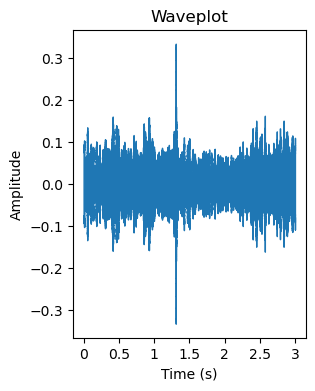

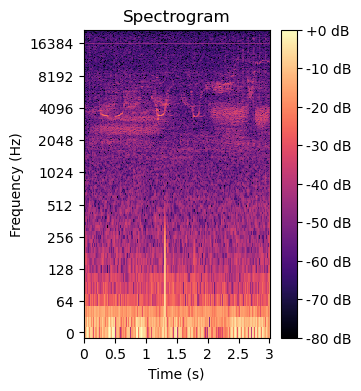

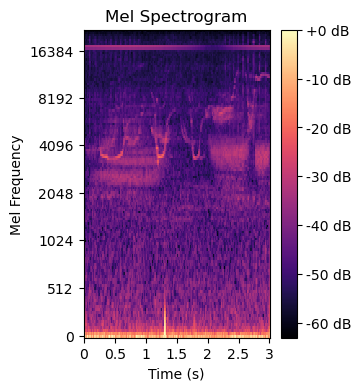

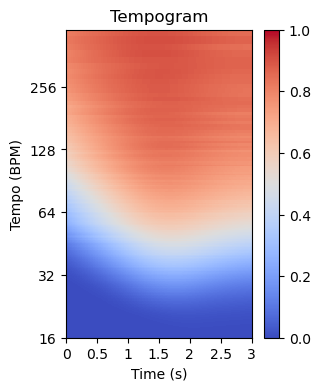

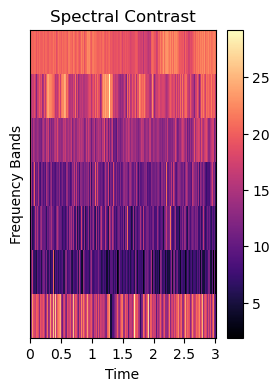

Processing C:\Users\medep\Downloads\project dataset\data\BAIJI_DOLPHIN\129087.wav for label: BAIJI_DOLPHIN


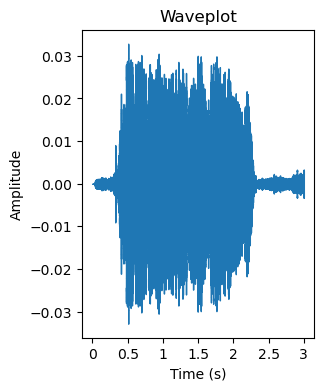

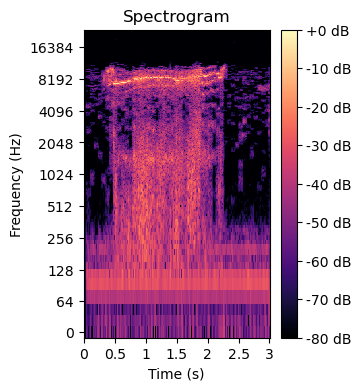

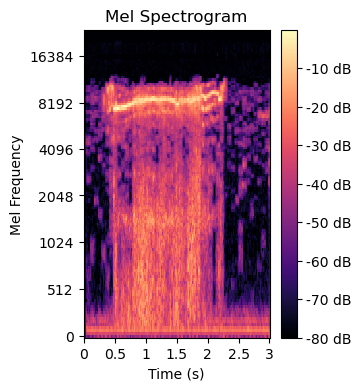

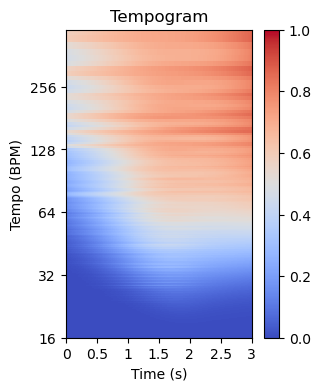

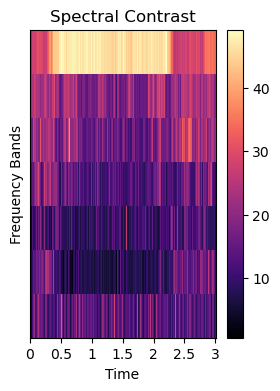

Processing C:\Users\medep\Downloads\project dataset\data\BeakedWhales\67788866.wav for label: BeakedWhales


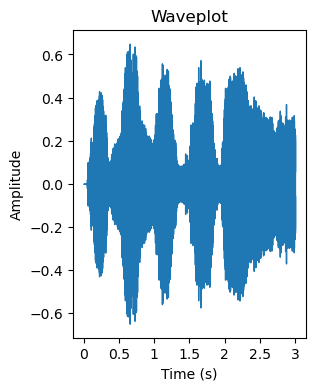

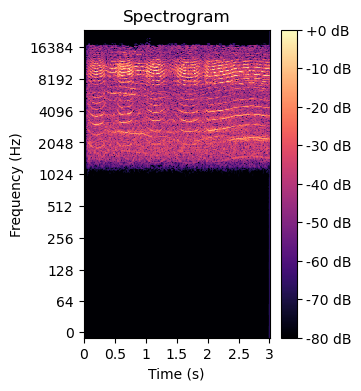

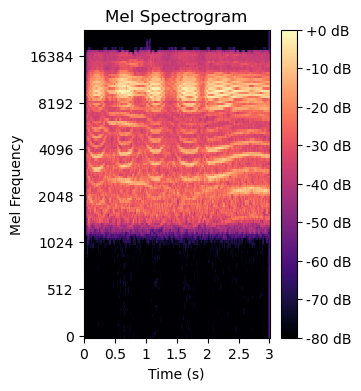

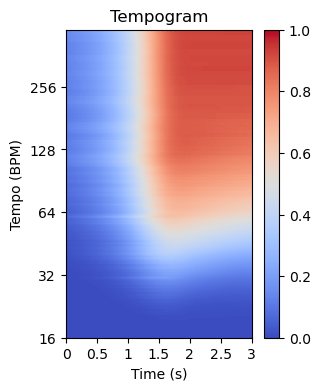

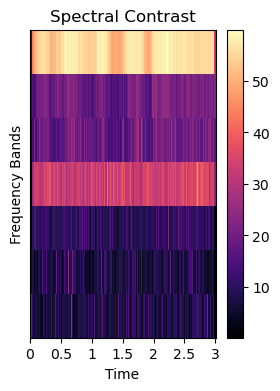

Processing C:\Users\medep\Downloads\project dataset\data\BeardedSeal\66036001.wav for label: BeardedSeal


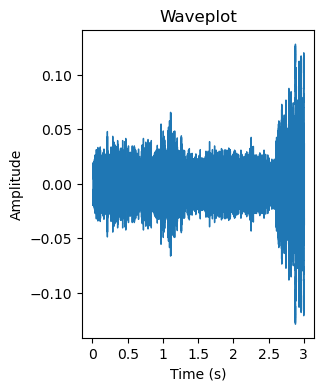

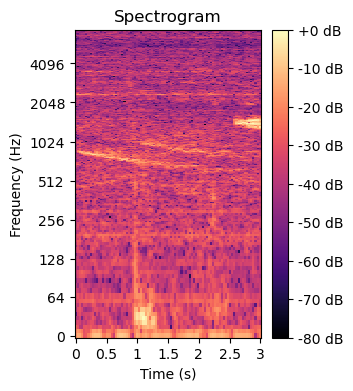

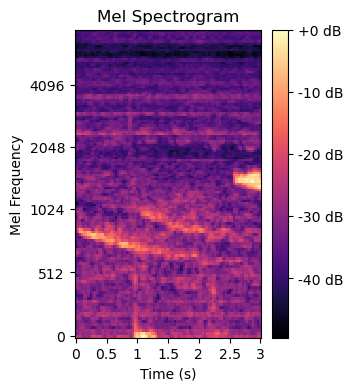

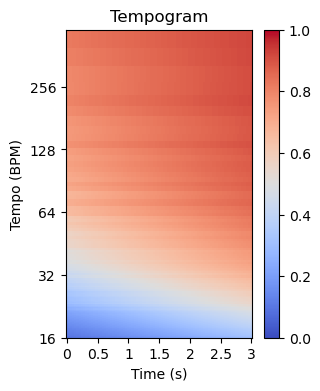

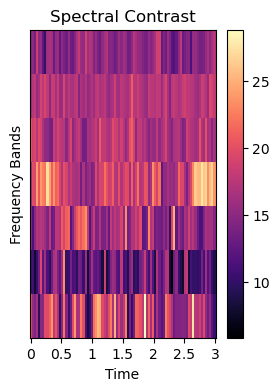

Processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001001.wav for label: Beluga_WhiteWhale


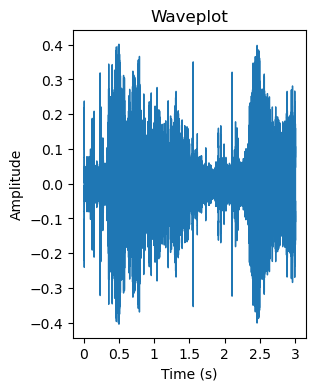

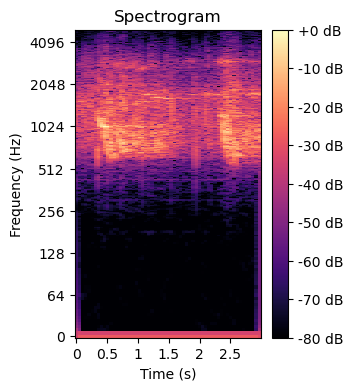

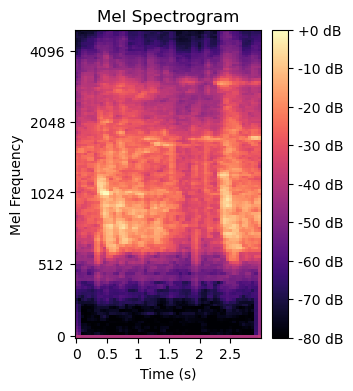

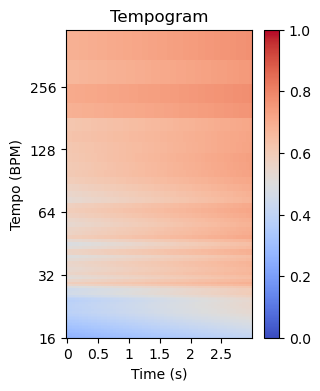

Error processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001001.wav: Frequency band exceeds Nyquist. Reduce either fmin or n_bands.
Processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001002.wav for label: Beluga_WhiteWhale


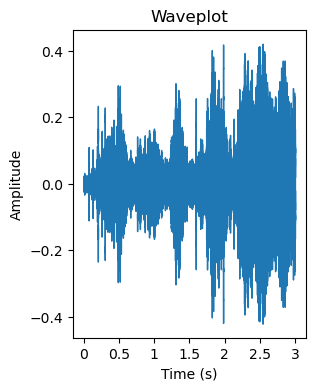

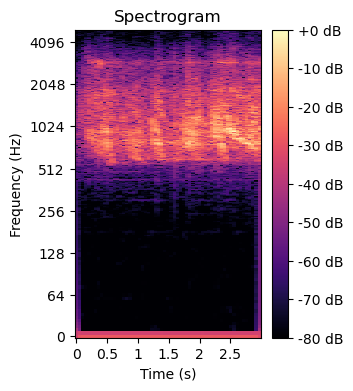

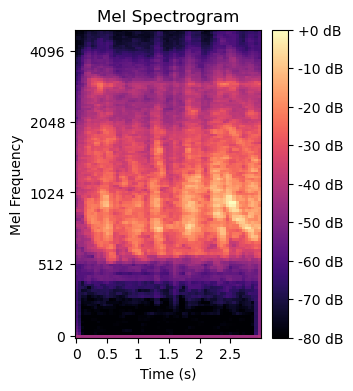

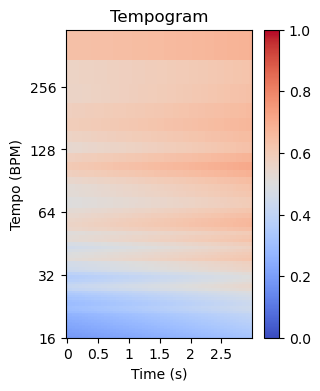

Error processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001002.wav: Frequency band exceeds Nyquist. Reduce either fmin or n_bands.
Processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001003.wav for label: Beluga_WhiteWhale


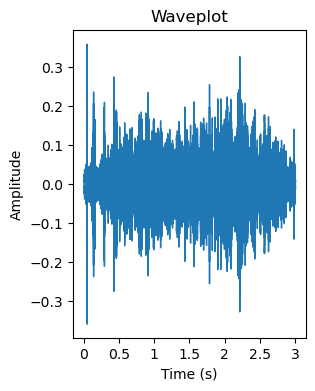

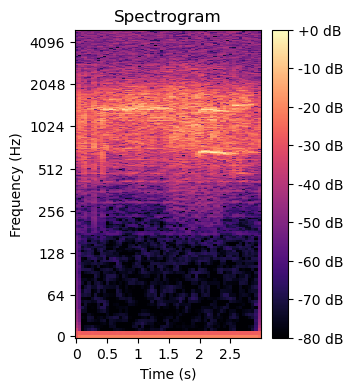

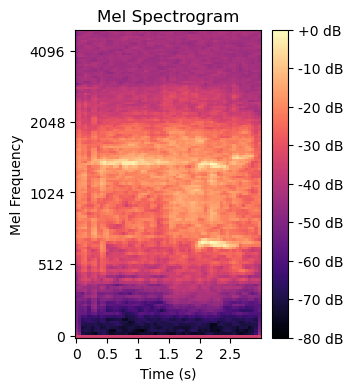

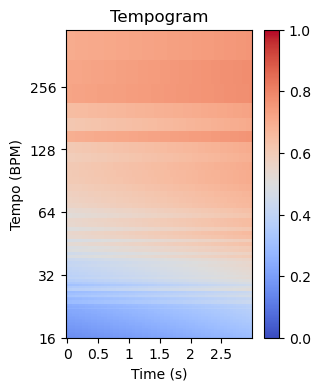

Error processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\49001003.wav: Frequency band exceeds Nyquist. Reduce either fmin or n_bands.
Processing C:\Users\medep\Downloads\project dataset\data\Beluga_WhiteWhale\62012001.wav for label: Beluga_WhiteWhale


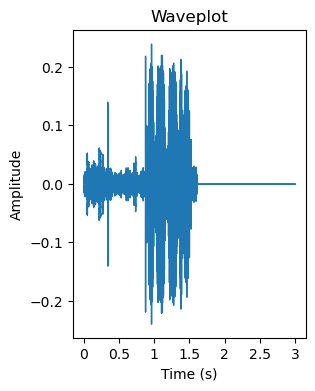

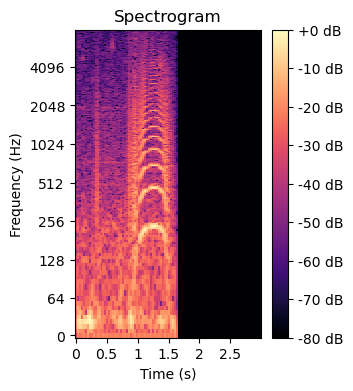

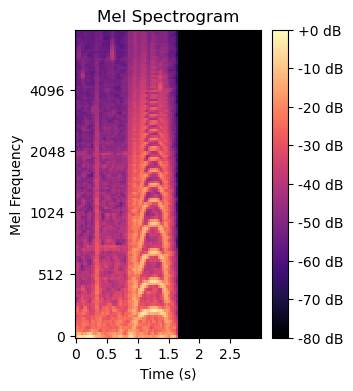

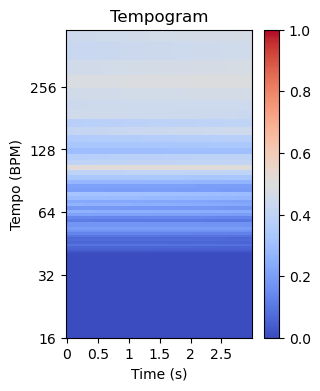

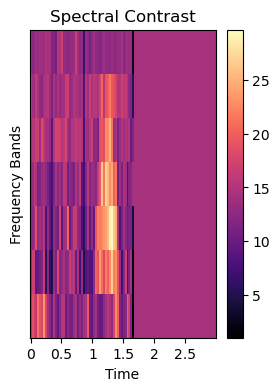

Processing C:\Users\medep\Downloads\project dataset\data\BlueWhale\12345.wav for label: BlueWhale


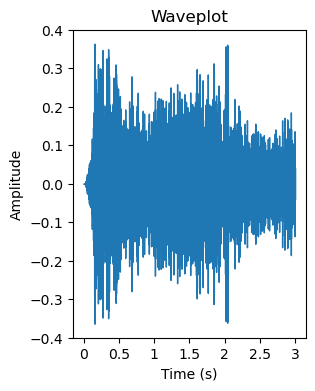

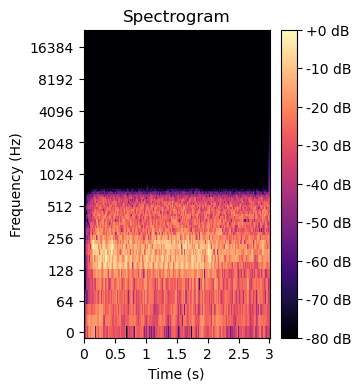

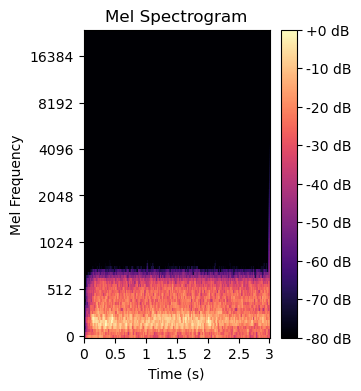

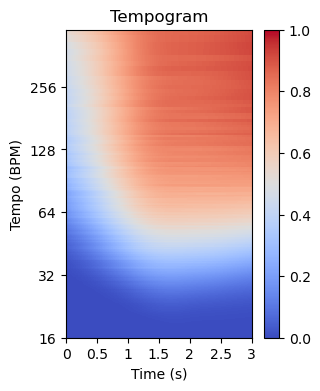

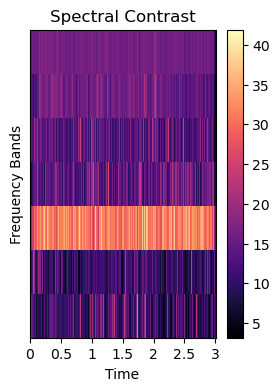

In [11]:
def plot_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)

    # Waveplot
    plt.figure(figsize=(3, 4))
    plt.title('Waveplot')
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Spectrogram
    D = librosa.stft(y)
    plt.figure(figsize=(3, 4))
    plt.title('Spectrogram')
    librosa.display.specshow(librosa.amplitude_to_db(abs(D), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

    # Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    plt.figure(figsize=(3, 4))
    plt.title('Mel Spectrogram')
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()
    
    tempogram = librosa.feature.tempogram(y=y, sr=sr)

    # Tempogram
    plt.figure(figsize=(3, 4))
    librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo')
    plt.colorbar()
    plt.title('Tempogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Tempo (BPM)')
    plt.show()
    

    # Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    plt.figure(figsize=(3, 4))
    librosa.display.specshow(spectral_contrast, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast')
    plt.ylabel('Frequency Bands')
    plt.xlabel('Time')
    plt.show()


labels_processed = set()
counter = 0

for label_dir in glob.iglob(os.path.join(base_dir, '*')):
    label = os.path.basename(label_dir)
    counter+=1
    if counter >6:
        break
    
    if label in labels_processed:
        continue
    
    for audio_file in glob.iglob(os.path.join(label_dir, '*.wav')):
        try:
            print(f'Processing {audio_file} for label: {label}')
            plot_features(audio_file)
            labels_processed.add(label)
            break 
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")

In [12]:
def extract_features(audio_path,offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=3)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048,
    hop_length=512,
    n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    # mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs

In [13]:
from tqdm import tqdm

In [14]:
from sklearn.model_selection import train_test_split


x_train = []
x_test = []

for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))
    
for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))

x_test = (np.asarray(x_test))
x_train = (np.asarray(x_train))
print("X train:", train.shape)
print("X test:", test.shape)

100%|██████████| 2826/2826 [00:49<00:00, 57.17it/s]


X train: (11303, 3)
X test: (2826, 3)


In [15]:
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical

In [16]:
from sklearn.preprocessing import LabelEncoder

all_labels = pd.concat([train.label, test.label])

encoder = LabelEncoder()
encoder.fit(all_labels)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print("Class weights:", class_weights)



Class weights: [9.10064412e-01 1.63811594e+02 1.63811594e+02 1.47578013e+00
 1.56011042e+00 4.09528986e+01 1.05684899e+00 7.80055210e+00
 5.11911232e-01 1.63811594e+02 7.80055210e-01 2.60431787e-01
 1.63811594e+02 4.42734038e+00 7.12224323e+00 4.42734038e-01
 3.50774292e-01 8.19057971e+01 1.17850068e+00 5.66822125e-01
 4.09528986e+01 5.85041408e+00 4.09528986e+00 5.11911232e+00
 1.63811594e+01 8.19057971e+01 3.59235952e-01 1.63811594e+02
 3.27623188e+01 5.46038647e+01 7.90596497e-02 4.20029729e+00
 3.27623188e+00 1.99770237e-01 1.63811594e+02 1.26985732e+00
 1.63811594e+02 8.62166285e+00 2.24399444e+00 1.63811594e+02
 4.86087817e-01 1.63811594e+02 1.63811594e+02 2.34687098e-01
 1.63811594e+02 1.63811594e+02 4.31083143e+00 5.11911232e+00
 1.70637077e+00 2.21367019e+00 8.19057971e+01 1.63811594e+02
 1.63811594e+02 1.63811594e+02 3.58449878e-01 1.63811594e+02
 4.55032206e+00 1.49599629e-01 4.29951691e-01 1.63811594e+02
 9.10064412e+00 3.27623188e+01 1.63811594e+02 3.28938944e-01
 2.340165

In [17]:
weight = {i: class_weights[i] for i in range(len(class_weights))}
weight

{0: 0.9100644122383252,
 1: 163.81159420289856,
 2: 163.81159420289856,
 3: 1.475780127954041,
 4: 1.560110420979986,
 5: 40.95289855072464,
 6: 1.05684899485741,
 7: 7.800552104899931,
 8: 0.511911231884058,
 9: 163.81159420289856,
 10: 0.780055210489993,
 11: 0.26043178728600724,
 12: 163.81159420289856,
 13: 4.427340383862123,
 14: 7.122243226212981,
 15: 0.4427340383862123,
 16: 0.350774291655029,
 17: 81.90579710144928,
 18: 1.1785006777186946,
 19: 0.5668221252695451,
 20: 40.95289855072464,
 21: 5.850414078674948,
 22: 4.095289855072464,
 23: 5.11911231884058,
 24: 16.381159420289855,
 25: 81.90579710144928,
 26: 0.3592359521993389,
 27: 163.81159420289856,
 28: 32.76231884057971,
 29: 54.60386473429951,
 30: 0.07905964971182362,
 31: 4.200297287253809,
 32: 3.276231884057971,
 33: 0.19977023683280312,
 34: 163.81159420289856,
 35: 1.2698573194023144,
 36: 163.81159420289856,
 37: 8.621662852784134,
 38: 2.2439944411355968,
 39: 163.81159420289856,
 40: 0.48608781662581174,
 41:

In [18]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (11303, 40, 130, 1)
Y train: (11303, 72)
X test: (2826, 40, 130, 1)
Y test: (2826, 72)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(40, 130, 1)),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Conv2D(64, kernel_size=3, activation='relu'),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Conv2D(128, kernel_size=3, activation='relu'),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.4),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 38, 128, 32)       320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 19, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 19, 64, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 62, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 15, 60, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 30, 64)         0         
 ng2D)                                                

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [49]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
354/354 [==============================] - 24s 63ms/step - loss: 2.8040 - accuracy: 0.3116 - val_loss: 2.0318 - val_accuracy: 0.4611
Epoch 2/50
354/354 [==============================] - 23s 65ms/step - loss: 1.9001 - accuracy: 0.4992 - val_loss: 1.5455 - val_accuracy: 0.6270
Epoch 3/50
354/354 [==============================] - 23s 65ms/step - loss: 1.5462 - accuracy: 0.5971 - val_loss: 1.2292 - val_accuracy: 0.6709
Epoch 4/50
354/354 [==============================] - 23s 65ms/step - loss: 1.3465 - accuracy: 0.6405 - val_loss: 1.0854 - val_accuracy: 0.7059
Epoch 5/50
354/354 [==============================] - 22s 61ms/step - loss: 1.2056 - accuracy: 0.6743 - val_loss: 0.9916 - val_accuracy: 0.7219
Epoch 6/50
354/354 [==============================] - 21s 59ms/step - loss: 1.0930 - accuracy: 0.6995 - val_loss: 0.8778 - val_accuracy: 0.7534
Epoch 7/50
354/354 [==============================] - 21s 59ms/step - loss: 1.0180 - accuracy: 0.7152 - val_loss: 0.8319 - val_accuracy:

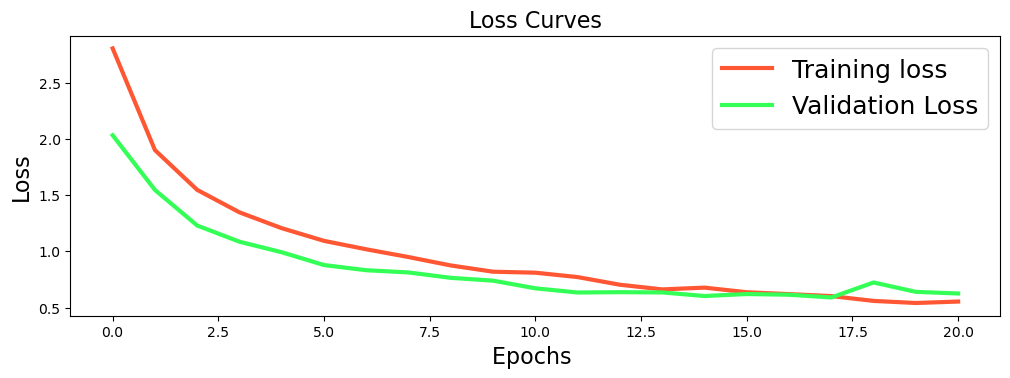

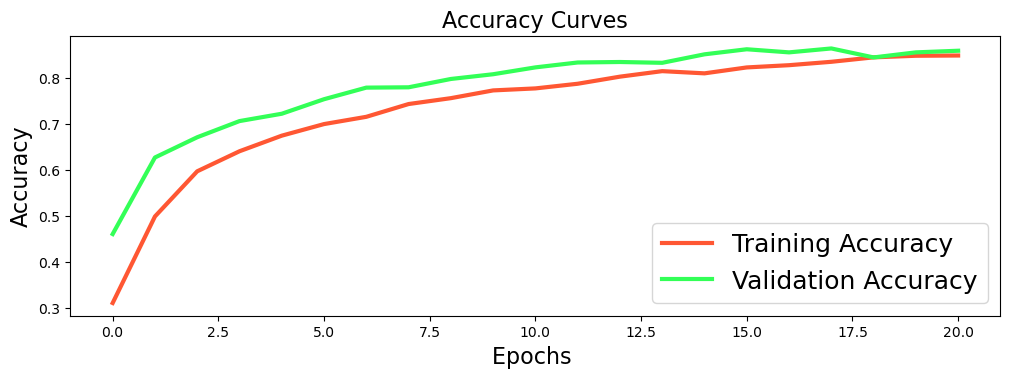

In [50]:
# Loss Curves
plt.figure(figsize=[12,8])
plt.subplot(211)
plt.plot(history.history['loss'],'#FF5733',linewidth=3.0)  
plt.plot(history.history['val_loss'],'#33FF57',linewidth=3.0)  
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[12,8])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#FF5733',linewidth=3.0)  
plt.plot(history.history['val_accuracy'],'#33FF57',linewidth=3.0)  
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.show()


In [51]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

89/89 [==============================] - 1s 15ms/step - loss: 0.6249 - accuracy: 0.8585
Test loss: 0.624876081943512
Test accuracy: 0.8584572076797485


In [52]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [53]:
predictions = model.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
print(classification_report(y_pred, y_true))

89/89 [==============================] - 1s 15ms/step
                           precision    recall  f1-score   support

   AtlanticSpottedDolphin       0.94      0.98      0.96        50
              BeardedSeal       0.30      0.38      0.33        21
        Beluga_WhiteWhale       0.54      0.76      0.63        25
        BottlenoseDolphin       0.67      0.69      0.68        32
 Boutu_AmazonRiverDolphin       0.86      1.00      0.92         6
             BowheadWhale       0.98      0.67      0.80       119
           ClymeneDolphin       0.75      0.91      0.83        47
            CommonDolphin       0.91      0.82      0.86       184
           Dall'sPorpoise       0.11      1.00      0.20         1
             DuskyDolphin       1.00      1.00      1.00         3
         FalseKillerWhale       0.98      0.96      0.97        92
         Fin_FinbackWhale       0.99      0.99      0.99       110
            FraserDolphin       0.63      0.80      0.71        41
     Gr

C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
model_name = "marine.h5"
model.save("marine.h5")

C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
from tensorflow.keras.models import load_model
model = load_model("marine.h5")

In [56]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

model = load_model('marine.h5')  # Replace 'your_model_path.h5' with the path to your saved model

classify_file = "C:\\Users\\medep\\Downloads\\project dataset\\data\\Fin_FinbackWhale\\7701800A.wav"
test_x = []
test_x.append(extract_features(classify_file, 0.5))  # Assuming you have a function called 'extract_features'
test_x = np.asarray(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

resized_test_x = tf.image.resize(test_x, [40, 130])

pred = model.predict(resized_test_x, verbose=1)
print(pred)


1/1 [==============================] - 0s 123ms/step
[[2.37989731e-24 0.00000000e+00 0.00000000e+00 2.13023293e-19
  6.03635912e-17 1.40491121e-14 9.46120248e-24 1.09344033e-30
  1.62658780e-23 3.68561181e-29 8.93891550e-23 3.48146837e-18
  0.00000000e+00 1.34996656e-22 1.92427140e-33 2.92065874e-20
  9.99698758e-01 0.00000000e+00 9.89085163e-24 1.88482491e-15
  1.53354579e-29 3.01279157e-04 8.51563054e-22 0.00000000e+00
  1.99563490e-26 0.00000000e+00 3.97378517e-30 1.02280335e-18
  1.06743496e-37 0.00000000e+00 0.00000000e+00 1.50807448e-26
  2.28793424e-28 3.11120556e-22 1.04390329e-19 0.00000000e+00
  4.08460151e-35 1.99218341e-24 3.95538316e-36 6.31367730e-19
  1.04292472e-18 0.00000000e+00 0.00000000e+00 7.99415468e-19
  0.00000000e+00 9.18920593e-37 1.03189374e-10 0.00000000e+00
  0.00000000e+00 3.65504779e-21 1.09599562e-23 4.07611891e-20
  0.00000000e+00 1.22974215e-34 0.00000000e+00 3.25825417e-36
  0.00000000e+00 2.10294818e-14 0.00000000e+00 7.31948466e-22
  3.05212398e-14 

In [57]:
pred_class = model.predict(test_x)
index = np.argmax(pred_class, axis=1)
print(classes[index])

1/1 [==============================] - 0s 102ms/step
['Fin_FinbackWhale']


# Transfer learning using pre-trained models

In [116]:
from tensorflow.keras.applications import resnet
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import pandas as pd


In [117]:
resnet_base = resnet.ResNet50(include_top=False, weights=None, input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))



In [118]:
output_resnet = resnet_base.layers[-1].output
output_resnet = Flatten()(output_resnet)
resnet_model = Model(resnet_base.input, output_resnet)

In [119]:
pd.set_option('max_colwidth', 1)
layers_resnet = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers_resnet, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])



,Layer Type,Layer Name,Layer Trainable
0,<keras.src.engine.input_layer.InputLayer object at 0x000002432B6C26D0>,input_6,True
1,<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000002432B5393D0>,conv1_pad,True
2,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000002432B6C4E90>,conv1_conv,True
3,<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x000002432AFE45D0>,conv1_bn,True
4,<keras.src.layers.core.activation.Activation object at 0x000002432B276750>,conv1_relu,True
...,...,...,...
171,<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000243290DCE50>,conv5_block3_3_conv,True
172,<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x00000243289C4C10>,conv5_block3_3_bn,True
173,<keras.src.layers.merging.add.Add object at 0x00000243281555D0>,conv5_block3_add,True
174,<keras.src.layers.core.activation.Activation object at 0x000002432B7BA490>,conv5_block3_out,True


In [120]:
model_resnet = Sequential()
model_resnet.add(resnet_model)
model_resnet.add(Dense(512, activation='relu'))
model_resnet.add(Dense(len(encoder.classes_), activation='softmax'))
model_resnet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_6 (Functional)        (None, 20480)             23581440  
                                                                 
 dense_16 (Dense)            (None, 512)               10486272  
                                                                 
 dense_17 (Dense)            (None, 72)                36936     
                                                                 
Total params: 34104648 (130.10 MB)
Trainable params: 34051528 (129.90 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [121]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopper = EarlyStopping(monitor='val_loss', patience=5)


In [122]:
model_resnet.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)


In [123]:
history_resnet = model_resnet.fit(x_train, y_train,
                                  batch_size=128,
                                  epochs=150,
                                  validation_data=(x_test, y_test),
                                  shuffle=True,
                                  callbacks=[early_stopper])

Epoch 1/150
89/89 [==============================] - 193s 2s/step - loss: 6.6573 - accuracy: 0.1616 - val_loss: 314.5362 - val_accuracy: 0.1451
Epoch 2/150
89/89 [==============================] - 169s 2s/step - loss: 2.9272 - accuracy: 0.3373 - val_loss: 3.0852 - val_accuracy: 0.1829
Epoch 3/150
89/89 [==============================] - 169s 2s/step - loss: 2.0518 - accuracy: 0.4601 - val_loss: 2.4724 - val_accuracy: 0.3061
Epoch 4/150
89/89 [==============================] - 167s 2s/step - loss: 1.3317 - accuracy: 0.6295 - val_loss: 2.0191 - val_accuracy: 0.4367
Epoch 5/150
89/89 [==============================] - 166s 2s/step - loss: 0.9671 - accuracy: 0.7303 - val_loss: 1.2822 - val_accuracy: 0.6253
Epoch 6/150
89/89 [==============================] - 167s 2s/step - loss: 0.7460 - accuracy: 0.7966 - val_loss: 1.2865 - val_accuracy: 0.6369
Epoch 7/150
89/89 [==============================] - 166s 2s/step - loss: 0.7993 - accuracy: 0.7852 - val_loss: 0.7724 - val_accuracy: 0.7990
Epoc

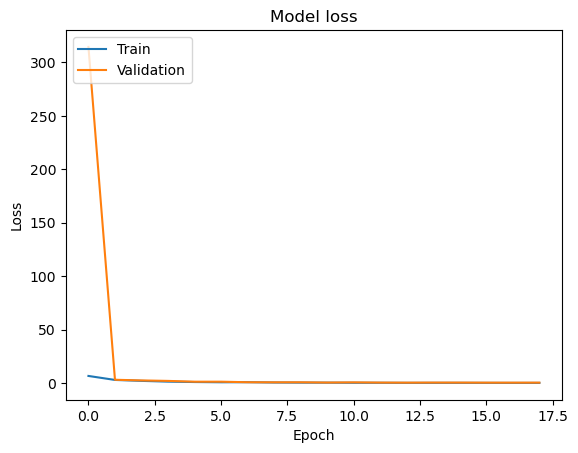

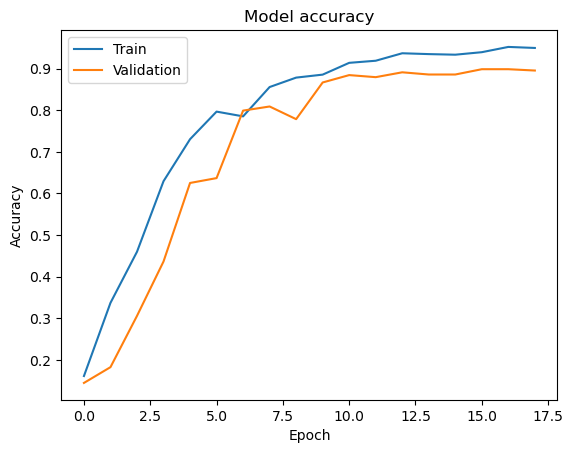

In [128]:
# Plot training & validation loss values
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

C:\Users\medep\AppData\Local\Temp\ipykernel_268\1880372857.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


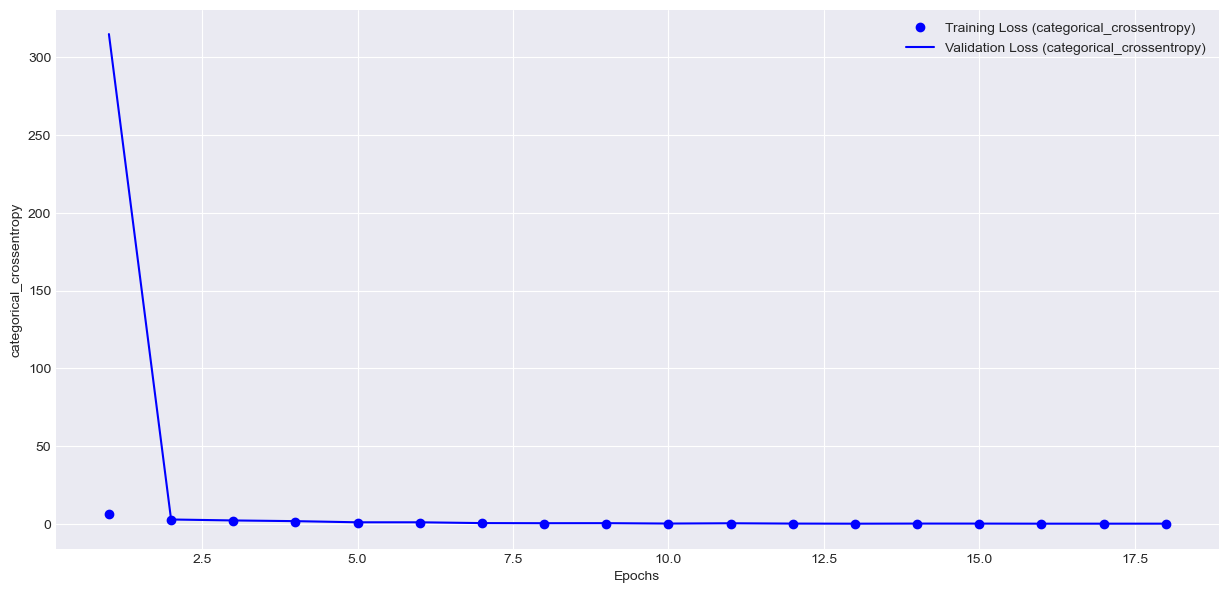

In [129]:
history_dict = history_resnet.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()

C:\Users\medep\AppData\Local\Temp\ipykernel_268\2764861407.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


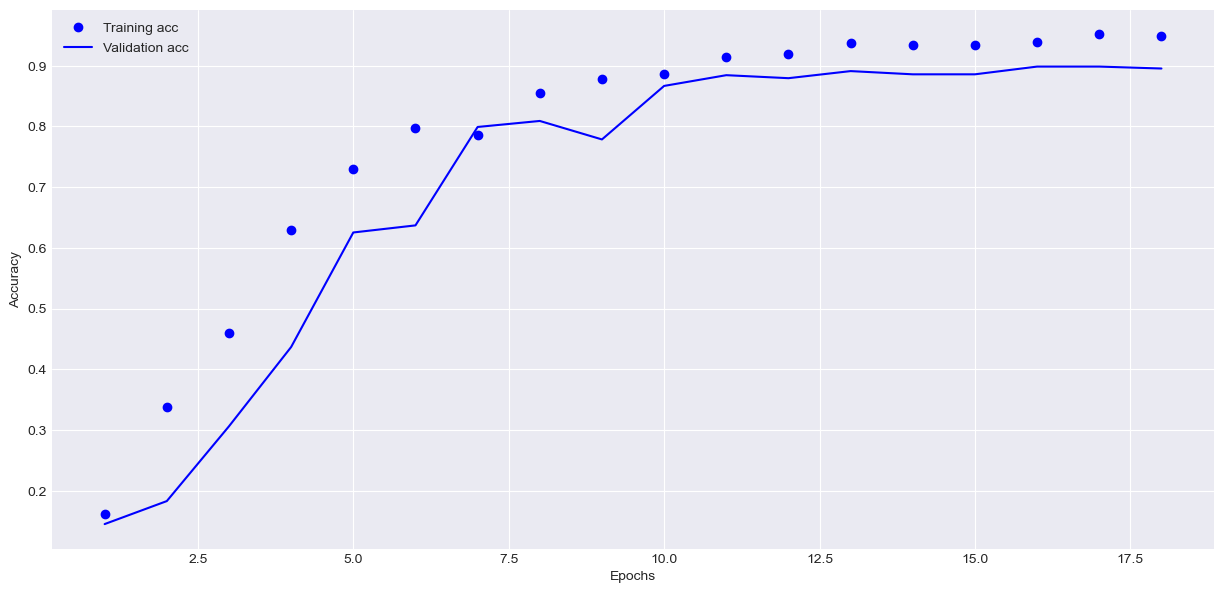

In [130]:
history_dict = history_resnet.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [133]:
test_loss, test_accuracy = model_resnet.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

89/89 [==============================] - 11s 127ms/step - loss: 0.4034 - accuracy: 0.8953
Test Loss: 0.4034346044063568
Test Accuracy: 0.8952583074569702


In [137]:
predicted_probabilities = model_resnet.predict(x_test)

89/89 [==============================] - 12s 131ms/step


In [138]:
predicted_classes = np.argmax(predicted_probabilities, axis=1)

In [140]:
true_classes = np.argmax(y_test, axis=1)

In [141]:
print(predicted_classes)
print(true_classes)

[71  8 46 ... 60  0 60]
[71  8 46 ... 60  0 60]


In [143]:
from sklearn.metrics import classification_report

y_true = y_test.argmax(axis=1)

print("Classification Report:")
print(classification_report(y_true, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           3       0.45      0.48      0.46        27
           4       0.96      0.74      0.84        35
           5       0.00      0.00      0.00         0
           6       0.81      0.88      0.84        33
           7       1.00      1.00      1.00         7
           8       0.74      0.94      0.83        82
          10       0.98      0.86      0.92        57
          11       0.93      0.90      0.91       164
          13       1.00      0.56      0.71         9
          14       1.00      1.00      1.00         3
          15       1.00      0.97      0.98        90
          16       0.96      0.99      0.98       110
          18       0.91      0.96      0.93        52
          19       0.88      0.90      0.89        68
          20       0.00      0.00      0.00         3
          21       1.00      1.00      1.00         4
    

C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

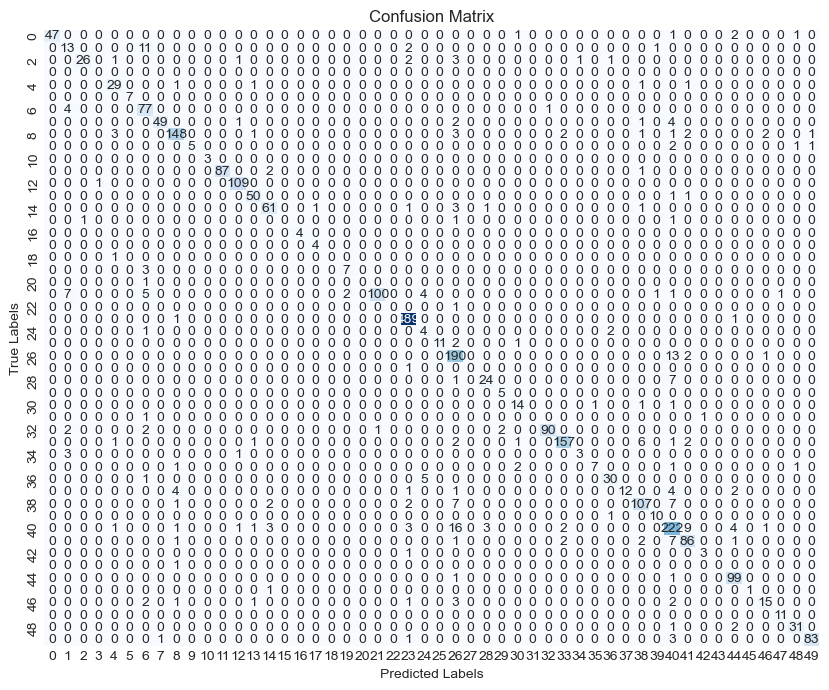

In [148]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [151]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']
scores = []

In [152]:
for opt in optimizers:
    model_resnet.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [154]:
 history = model_resnet.fit(x_train, y_train,
                               batch_size=128,
                               epochs=10,
                               validation_data=(x_test, y_test),
                               shuffle=True,
                               callbacks=[early_stopper])

Epoch 1/10
89/89 [==============================] - 180s 2s/step - loss: 0.1081 - accuracy: 0.9630 - val_loss: 0.3470 - val_accuracy: 0.9105
Epoch 2/10
89/89 [==============================] - 177s 2s/step - loss: 0.0945 - accuracy: 0.9678 - val_loss: 0.3364 - val_accuracy: 0.9115
Epoch 3/10
89/89 [==============================] - 181s 2s/step - loss: 0.0853 - accuracy: 0.9699 - val_loss: 0.3299 - val_accuracy: 0.9126
Epoch 4/10
89/89 [==============================] - 172s 2s/step - loss: 0.0822 - accuracy: 0.9709 - val_loss: 0.3251 - val_accuracy: 0.9133
Epoch 5/10
89/89 [==============================] - 173s 2s/step - loss: 0.0758 - accuracy: 0.9732 - val_loss: 0.3208 - val_accuracy: 0.9158
Epoch 6/10
89/89 [==============================] - 172s 2s/step - loss: 0.0780 - accuracy: 0.9734 - val_loss: 0.3178 - val_accuracy: 0.9172
Epoch 7/10
89/89 [==============================] - 172s 2s/step - loss: 0.0753 - accuracy: 0.9743 - val_loss: 0.3158 - val_accuracy: 0.9186
Epoch 8/10
89

In [156]:
test_loss, test_accuracy = model_resnet.evaluate(x_test, y_test)
scores.append(test_accuracy)

89/89 [==============================] - 11s 128ms/step - loss: 0.3097 - accuracy: 0.9207


In [157]:
print(scores)

[0.9207360148429871]


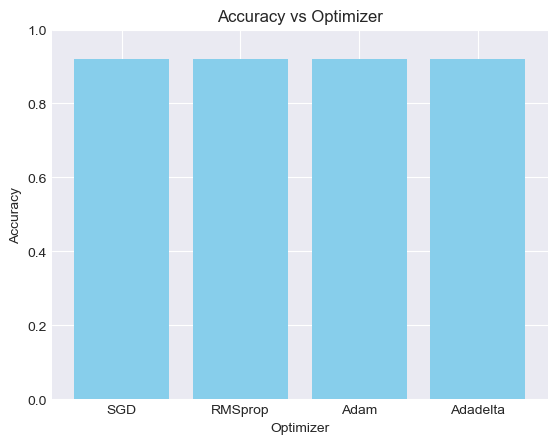

In [158]:
plt.bar(optimizers, scores, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Optimizer')
plt.ylim(0, 1) 
plt.show()